### Filter LIWC and TextAnalyzer data and merge them into one, and create response data to be fed into R code

In [30]:
import pandas as pd
import numpy as np

Read in data

In [31]:
liwc = pd.read_excel('CR_Apology/CR - Apology Existence - TA data - LIWC.xlsx')
ta = pd.read_excel('CR_Apology/CR - Apology Existence - TA data- Text Analyzer .xlsx')

In [32]:
sat = pd.read_excel('CR_Apology/CR - Apology Effectiveness - TA - satisfied.xlsx')
vis = pd.read_excel('CR_Apology/CR - Apology Effectiveness - TA - visit.xlsx')

In [33]:
#drop duplicate columns in textanalyzer data
ta.drop(columns=['row_num', 'hotel', 'rating', 'review', 'response',
       'triptype', 'dateofstay', 'responder', 'respondeddate', 'word count'] + [f'existence_rater{i}' for i in range(1, 14)], inplace=True)

In [34]:
#rename TextAnalyzer columns for clarity
ta.columns = [col_name + '_TA' for col_name in ta.columns]

In [35]:
df = liwc.join(ta)

Merge with brand data

In [36]:
brand = pd.read_excel('brand.xlsx')

In [37]:
brand.rename(columns={'Unnamed: 0':'row_num', 'Brand Names ':'Brand', 'Response': 'response'}, inplace=True)

In [38]:
brand.drop_duplicates('response', keep='first', inplace=True)

In [39]:
df = df.merge(brand[['response', 'Brand']], on='response')

### Existence

In [40]:
#get number of raters for each response
df['num_ratings'] = df[[f'existence_rater{i}' for i in range(1, 14)]].stack().reset_index().groupby('level_0').count()[0]

In [41]:
#get average rating of mturkers
df['mturk_rating'] = df[[f'existence_rater{i}' for i in range(1, 14)]].mean(axis=1)

In [42]:
import matplotlib.pyplot as plt

In [43]:
#create binary apology column
df['apology'] = df['mturk_rating'] > 0

In [44]:
existence = df[df.num_ratings >= 3]
existence.drop_duplicates(subset = 'response', inplace=True)

/Users/HIPark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


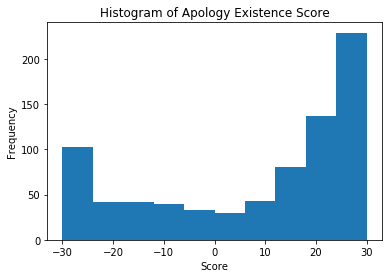

In [45]:
plt.hist(existence.mturk_rating)
plt.title('Histogram of Apology Existence Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [46]:
ones = existence[existence['apology'] == 1].index
zeros = existence[existence['apology'] == 0].index

In [47]:
ones = existence.loc[np.random.choice(ones, 400, replace=False)]

In [48]:
zeros = pd.concat([existence.loc[np.random.choice(zeros, (400 - len(zeros)), replace=True)], existence.loc[zeros]])

In [49]:
existence = pd.concat([ones, zeros])

In [50]:
df.drop(columns = [f'existence_rater{i}' for i in range(1, 14)], inplace=True)

In [51]:
df.drop(columns=['num_ratings', 'mturk_rating', 'apology'], inplace=True)

In [ ]:
existence.to_csv('existence_bal.csv', index=False)

### Satisfied and Visit

In [52]:
sat = sat[['row_num'] + [f'satisfied_rater{i}' for i in range(1, 14)]].merge(df, on='row_num')

In [53]:
sat['num_ratings'] = sat[[f'satisfied_rater{i}' for i in range(1, 14)]].stack().reset_index().groupby('level_0').count()[0]

In [54]:
sat['mturk_rating'] = sat[[f'satisfied_rater{i}' for i in range(1, 14)]].mean(axis=1)

In [55]:
sat['satisfied'] = sat['mturk_rating'] > 0

In [56]:
#sd = sat['mturk_rating'].std()
#mean = sat['mturk_rating'].mean()

In [57]:
#sat['satisfied_sd'] = None

In [58]:
#sat['satisfied_sd'][(sat['mturk_rating'] < mean - 0.5*sd)] = 0
#sat['satisfied_sd'][(sat['mturk_rating'] > mean + 0.5*sd)] = 1

In [59]:
sat = sat[sat.num_ratings >= 3]

In [60]:
sat.drop_duplicates(subset = 'response', inplace=True)

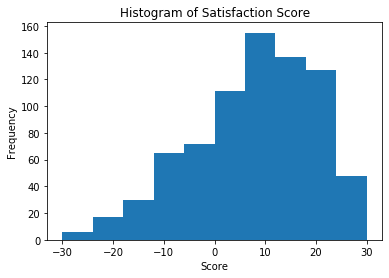

In [61]:
plt.hist(sat.mturk_rating)
plt.title('Histogram of Satisfaction Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [62]:
#sat.to_csv('satisfied.csv', index=False)

In [63]:
ones = sat[sat['satisfied'] == 1].index
zeros = sat[sat['satisfied'] == 0].index

In [64]:
ones = sat.loc[np.random.choice(ones, 400, replace=False)]
zeros = pd.concat([sat.loc[np.random.choice(zeros, (400 - len(zeros)), replace=True)], sat.loc[zeros]])
sat = pd.concat([ones, zeros])

In [77]:
sat.to_csv('satisfied_bal.csv', index=False)

In [65]:
vis = vis[['row_num'] + [f'visit_rater{i}' for i in range(1, 14)]].merge(df, on='row_num')

In [66]:
vis['num_ratings'] = vis[[f'visit_rater{i}' for i in range(1, 14)]].stack().reset_index().groupby('level_0').count()[0]

In [67]:
vis['mturk_rating'] = vis[[f'visit_rater{i}' for i in range(1, 14)]].mean(axis=1)

In [68]:
vis['visit'] = vis['mturk_rating'] > 0

In [69]:
#sd = vis['mturk_rating'].std()
#mean = vis['mturk_rating'].mean()
#vis['visit_sd'] = None
#vis['visit_sd'][(vis['mturk_rating'] < mean - 0.5*sd)] = 0
#vis['visit_sd'][(vis['mturk_rating'] > mean + 0.5*sd)] = 1

In [70]:
vis = vis[vis.num_ratings >= 3]

In [71]:
vis.drop_duplicates(subset = 'response', inplace=True)

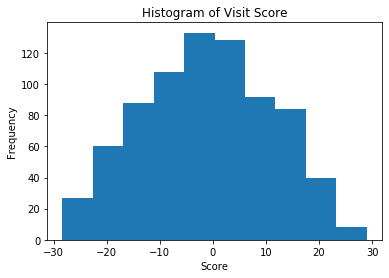

In [72]:
plt.hist(vis.mturk_rating)
plt.title('Histogram of Visit Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [73]:
ones = vis[vis['visit'] == 1].index
zeros = vis[vis['visit'] == 0].index

In [74]:
zeros = vis.loc[np.random.choice(zeros, 400, replace=False)]
ones = pd.concat([vis.loc[np.random.choice(ones, (400 - len(ones)), replace=True)], vis.loc[ones]])
vis = pd.concat([ones, zeros])

In [75]:
#vis.to_csv('visit.csv', index=False)

In [76]:
vis.to_csv('visit_bal.csv', index=False)

In [94]:
df = pd.read_csv('visit.csv')

In [95]:
df1 = pd.read_csv('existence.csv')

In [96]:
df2 = pd.read_csv('satisfied.csv')

In [97]:
vis = df[['row_num', 'visit']].merge(df1[['row_num', 'apology']], on='row_num')
sat = df2[['row_num', 'satisfied']].merge(df1[['row_num', 'apology']], on='row_num')

In [16]:
vis_chart = [len(vis[(vis.visit == True) & (vis.apology == True)]), len(vis[(vis.visit == True) & (vis.apology == False)]),
len(vis[(vis.visit == False) & (vis.apology == True)]), len(vis[(vis.visit == False) & (vis.apology == False)])]
sat_chart = [len(sat[(sat.satisfied == True) & (sat.apology == True)]), len(sat[(sat.satisfied == True) & (sat.apology == False)]),
len(sat[(sat.satisfied == False) & (sat.apology == True)]), len(sat[(sat.satisfied == False) & (sat.apology == False)])]

In [21]:
sat_label = ['Satisfied, Apology', 'Satisfied, No Apology', 'Not Satisfied, Apology', 'Not Satisfied, No Apology']
vis_label = ['Visit, Apology', 'Visit, No Apology', 'No Visit, Apology', 'No Visit, No Apology']

In [19]:
import matplotlib.pyplot as plt

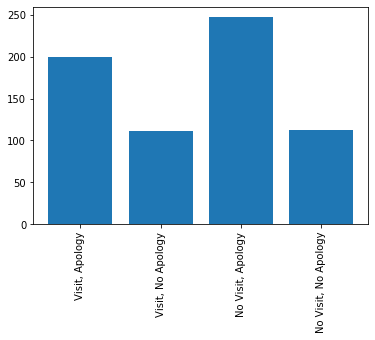

In [25]:
plt.bar(vis_label, vis_chart)
plt.xticks(rotation=90)
plt.show()

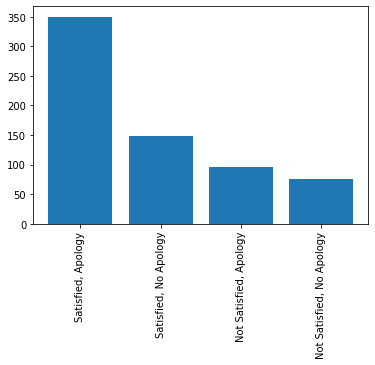

In [26]:
plt.bar(sat_label, sat_chart)
plt.xticks(rotation=90)
plt.show()